# Handling filter objects

The most fundamental building block of photometric surveys lies in the bandpass filters used to conduct them. In this example we will learn how to use the `Filter` class which is used in (nearly) every use-case of the `galfind` code. We start by looking at the JWST/NIRCam/F444W band, which is very commonly used in both blank field and cluster surveys.

In [21]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from galfind import Filter, Multiple_Filter
from galfind import U, V, J

In [22]:
# Example 1: Create a filter object from a filter name
facility = "JWST"
instrument = "NIRCam"
filter_name = "F444W"
f444w = Filter.from_SVO(facility, instrument, filter_name)

We can also very simply plot this filter profile so we can check that it looks correct. This in-built function also allows the user to choose the filter colour; we choose to plot this filter in red since it is the reddest wideband available for JWST/NIRCam.

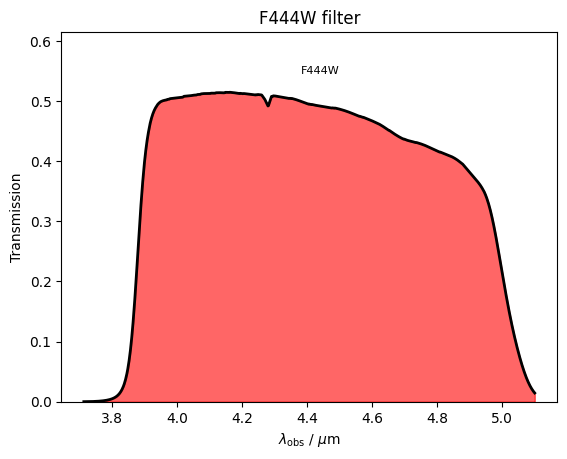

****************************************
JWST/NIRCam/F444W
----------
DetectorType: photon counter
Description: NIRCam F444W filter
Comments: includes NIRCam optics, DBS, QE and JWST Optical Telescope Element
WavelengthRef: 44043.150837738 Angstrom
WavelengthMean: 44393.515120525 Angstrom
WavelengthEff: 43504.264673627 Angstrom
WavelengthMin: 38039.572043804 Angstrom
WavelengthMax: 50995.5 Angstrom
WidthEff: 10676.002928393 Angstrom
WavelengthCen: 44405.491515008 Angstrom
WavelengthPivot: 44043.150837738 Angstrom
WavelengthPeak: 43523.2 Angstrom
WavelengthPhot: 43732.035994545 Angstrom
FWHM: 11144.052434142 Angstrom
WavelengthUpper50: 49977.517732078995 Angstrom
WavelengthLower50: 38833.465297937 Angstrom
****************************************



In [23]:
# Example 2: Display filter and metadata
# Construct the axis to plot this filter on using matplotlib
fig, ax = plt.subplots()
f444w.plot(ax, colour = "red", show = True)

# Have a look at the meta properties of the filter
print(f444w)

In the above example, we have taken the filter profile (and associated properties) directly from the [SVO Filter Profile service]("http://svo2.cab.inta-csic.es/theory/fps/"). In addition to those available via SVO, `galfind` also provides a set of top-hat UVJ filters useful for the identification of passive galaxies at $z<4$ or so. When plotting these UVJ filters, we utilize the option to change the wavelength units that are plotted on the x axis. For more information on how `galfind` handles standard unit conversions, please see [Galfind unit conversions](../misc/units.ipynb).

****************************************
U
----------
WavelengthCen: 3650.0 Angstrom
FWHM: 660.0 Angstrom
****************************************

****************************************
V
----------
WavelengthCen: 5510.0 Angstrom
FWHM: 880.0 Angstrom
****************************************

****************************************
J
----------
WavelengthCen: 12200.0 Angstrom
FWHM: 2130.0 Angstrom
****************************************



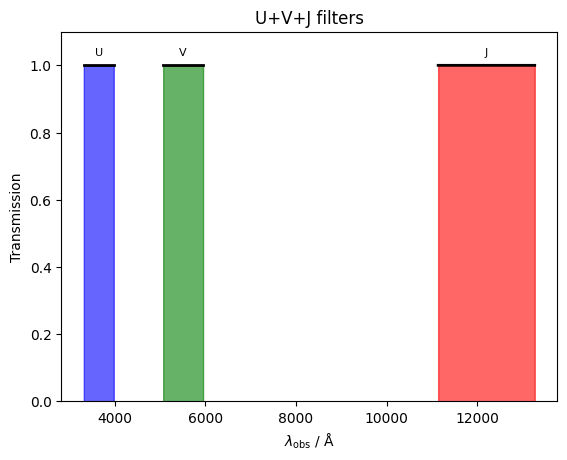

In [24]:
# Example 3: Create UVJ filters
# initialize the UVJ filters
U_filter = U()
V_filter = V()
J_filter = J()
filters_to_plot = [U_filter, V_filter, J_filter]

# plot the UVJ filters
fig, ax = plt.subplots()
# plotting meta
wav_units = u.AA
colours_to_plot = ["blue", "green", "red"]
for i, (filt, colour) in enumerate(zip(filters_to_plot, colours_to_plot)):
    # print string representation of the filter
    print(filt)
    # plot the filter on the axis
    filt.plot(ax, wav_units = wav_units, show = True if i == len(filters_to_plot) - 1 else False, colour = colour)


We have now learnt how to both load in filters directly from the SVO as well as access the UVJ filters built into `galfind` itself, but what if we have some strange filter not included in either. Maybe we want to test out some future instrument (for instance the ELT MICADO filterset), or maybe we want to procrastinate? Let's have a little fun shall we.

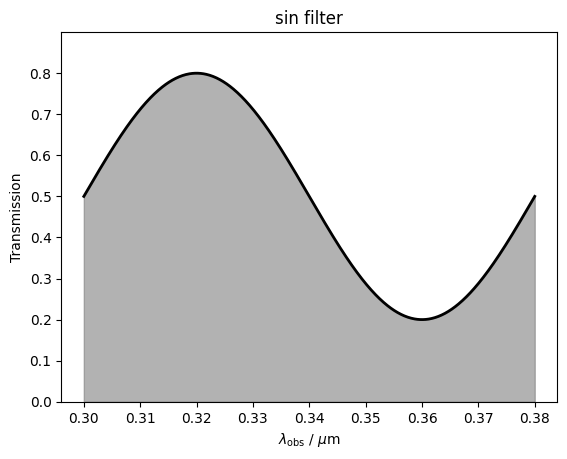

In [25]:

import numpy as np

# Example 3: Create a custom filter
# define a sin function for the filter throughput about a 0.5 midpoint
def sin_func(x, wavelength, amplitude = 0.3, const = 0.5):
    return amplitude * np.sin(x * 2 * np.pi / wavelength) + const

# create a filter object from the custom function
wav = list(np.linspace(3_000., 3_800., 800)) * u.AA
trans = sin_func(wav.value - wav[0].value, 800)
filt = Filter(None, "sin", wav, trans)
# plot the filter
fig, ax = plt.subplots()
filt.plot(ax, colour = "grey", label = False, show = True)